Produce a very simplistic plots of a simulation to have a quality check of simulations produced

<font color='orange'> Warning: this notebook shows quick example of plots to quicly check the consistency of the outptus.
The values are not tested (in particular the time step, the size of xx1 and xx2).
You should be cautious when modifying the code of this notebook.</font>

In [38]:
# Load the python modules.
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from l2s_utils import plot_L96_2D
from dapper import Chronology
#Insert the common folder in the path (to be able to load python module)
sys.path.insert(0,os.path.join(os.path.pardir,'common'))

### 1. Make a first plot

Shape of the dataset (3001, 20, 396)


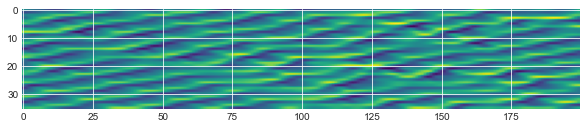

In [39]:
#path of the simulation to be check
#fname = '../data/L2S/simul/train/simul-truth-T15.0-N1-seed5.npz'
fname = '../data/L2S/simul/test/simul-truth-T15.0-N20-seed10.npz'

data = np.load(fname)
xx1 = data['xx']
print('Shape of the dataset',xx1.shape)

#Make a simple plot

#Member of the ensemble to plot
iens = 19

#Starting time step of the plot
start = 0

#Number of time step to plot
limT = 2000

#Number of grid point to plot (36: only slow variable)
Nx = 36

#Time sampling
dk = 10 #For true model
#dk = 5 #For trunated model
xx1 = xx1[start:start+limT:dk,iens,:Nx]

#plot
fig, ax  = plt.subplots(figsize=(10,5))
ax.imshow(xx1.T,cmap=plt.get_cmap('viridis'));

### 2. Make a second plot

Shape of the dataset (1501, 20, 36)


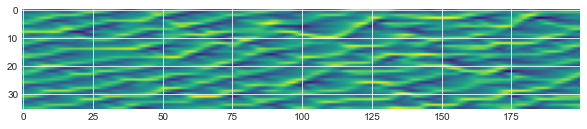

In [40]:
#path of the simulation to be check
#fname = '../data/L2S/simul/train/simul-truth-T15.0-N1-seed5.npz'
fname = '../data/L2S/simul/test/simul-trunc-T15.0-N20-seed10.npz'

data = np.load(fname)
xx2 = data['xx']
print('Shape of the dataset',xx2.shape)

#Make a simple plot

#Member of the ensemble to plot
iens = 19

#Starting time step of the plot
start = 0

#Number of time step to plot
limT = 1000

#Number of grid point to plot (36: only slow variable)
Nx = 36

#Time sampling
#dk = 10 #For true model
dk = 5 #For trunated model
xx2 = xx2[start:start+limT:dk,iens,:Nx]

#plot
fig, ax  = plt.subplots(figsize=(10,5))

ax.imshow(xx2.T,cmap=plt.get_cmap('viridis'))

### 3. Compare plots

In [41]:
#warning: hard coded
chrono = Chronology(K=xx1.shape[0]-1,dt=0.05,dkObs=1)

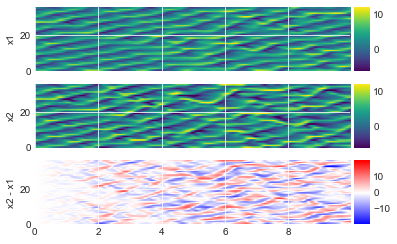

In [42]:
fig=plot_L96_2D(xx1,xx2,chrono.tt,['x1','x2'])